In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import metrics, model_selection, tree
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from statistics import mean

In [2]:
# Train data
X_train = pd.read_csv('x_train.csv').to_numpy()
y_train = pd.read_csv('y_train.csv')
y_train = y_train['LABEL']

# Test data
X_test = pd.read_csv('x_test.csv').to_numpy()
y_test = pd.read_csv('y_test.csv')
y_test = y_test['LABEL']

# Validation data
X_validation = pd.read_csv('x_validation.csv').to_numpy()
y_validation = pd.read_csv('y_validation.csv')
y_validation = y_validation['LABEL']

In [3]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=7)

In [4]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=7)

#### Validation data

In [5]:
clf.score(X_validation, y_validation)

0.9999227745273617

In [6]:
pred_validation = clf.predict(X_validation)

In [7]:
print(metrics.accuracy_score(y_validation, pred_validation))
print('Matriz de confusion', metrics.confusion_matrix(y_validation, pred_validation))
print(metrics.classification_report(y_validation, pred_validation, target_names=['0', '1', '2', '3']))

0.9999227745273617
Matriz de confusion [[68451    10     3     1]
 [    7 64954     0     0]
 [    0     0 92344     0]
 [    0     0     0 46161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     68465
           1       1.00      1.00      1.00     64961
           2       1.00      1.00      1.00     92344
           3       1.00      1.00      1.00     46161

    accuracy                           1.00    271931
   macro avg       1.00      1.00      1.00    271931
weighted avg       1.00      1.00      1.00    271931



#### Test data

In [8]:
clf.score(X_test, y_test)

0.9999021916319507

In [9]:
pred = clf.predict(X_test)

In [10]:
print(metrics.accuracy_score(y_test, pred))
print('Matriz de confusion', metrics.confusion_matrix(y_test, pred))
print(metrics.classification_report(y_test, pred, target_names=['0', '1', '2', '3']))

0.9999021916319507
Matriz de confusion [[138522     21      5      1]
 [    26 133267      0      0]
 [     0      0 187447      0]
 [     1      0      0  92810]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138549
           1       1.00      1.00      1.00    133293
           2       1.00      1.00      1.00    187447
           3       1.00      1.00      1.00     92811

    accuracy                           1.00    552100
   macro avg       1.00      1.00      1.00    552100
weighted avg       1.00      1.00      1.00    552100



In [11]:
# metrics.plot_roc_curve(clf, X_test, y_test)
# plt.show()

In [12]:
joblib.dump(clf, 'modelo1.h5')

['modelo1_v2.h5']

In [13]:
# Extraido de: https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic curves')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

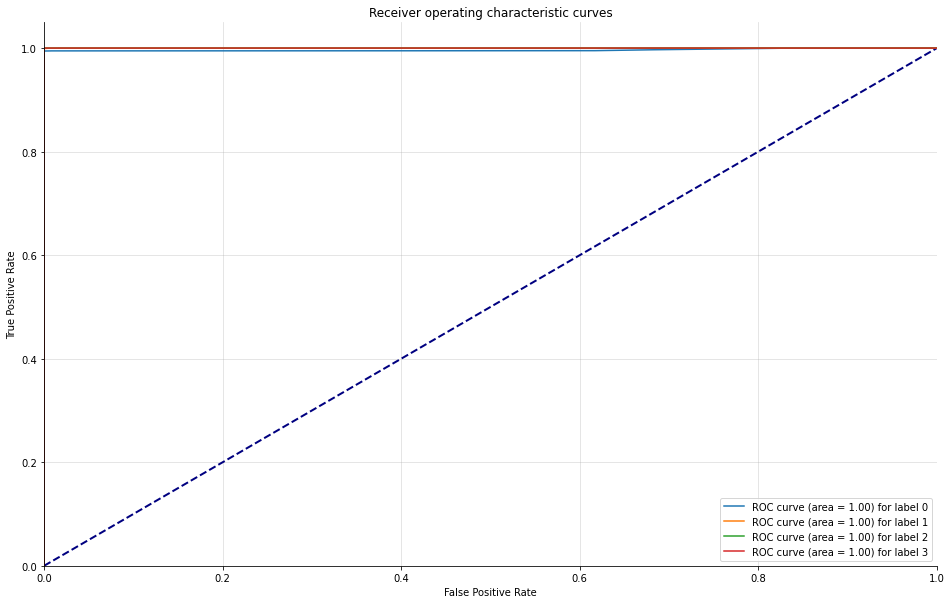

In [14]:
plot_multiclass_roc(clf, X_test, y_test, n_classes=4, figsize=(16, 10))

### Cross Validation
Fuente de consulta: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

In [16]:
rf_cv_score=cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(rf_cv_score)

[0.99989078 0.99992057 0.99996028 0.99995035 0.9997617  0.99988085
 0.99990071 0.99991064 0.99974185 0.99997021]


In [17]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [18]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 1.000 (0.000)


In [19]:
kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=None) 

for train_index, test_index in kf.split(X_train):
      print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = X_train[train_index], X_train[test_index] 
      Y_train, Y_test = y_train[train_index], y_train[test_index]

Train: [      0       2       3 ... 1007146 1007147 1007148] Validation: [      1       6      15 ... 1007125 1007126 1007134]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      8      46      55 ... 1007132 1007133 1007141]
Train: [      0       1       3 ... 1007146 1007147 1007148] Validation: [      2       4      39 ... 1007102 1007105 1007109]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      3      13      16 ... 1007119 1007122 1007138]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     21      31      44 ... 1007097 1007110 1007142]
Train: [      0       1       2 ... 1007143 1007146 1007148] Validation: [     11      26      43 ... 1007144 1007145 1007147]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     10      12      22 ... 1007130 1007139 1007143]
Train: [      1       2       3 ... 1007146 1007147 1007148] Validation: [      0       5      17 ... 1007107 1

In [20]:
kf = KFold(n_splits=10)
for train, test in kf.split(X_train):
    print("%s %s" % (train, test))

[ 100715  100716  100717 ... 1007146 1007147 1007148] [     0      1      2 ... 100712 100713 100714]
[      0       1       2 ... 1007146 1007147 1007148] [100715 100716 100717 ... 201427 201428 201429]
[      0       1       2 ... 1007146 1007147 1007148] [201430 201431 201432 ... 302142 302143 302144]
[      0       1       2 ... 1007146 1007147 1007148] [302145 302146 302147 ... 402857 402858 402859]
[      0       1       2 ... 1007146 1007147 1007148] [402860 402861 402862 ... 503572 503573 503574]
[      0       1       2 ... 1007146 1007147 1007148] [503575 503576 503577 ... 604287 604288 604289]
[      0       1       2 ... 1007146 1007147 1007148] [604290 604291 604292 ... 705002 705003 705004]
[      0       1       2 ... 1007146 1007147 1007148] [705005 705006 705007 ... 805717 805718 805719]
[      0       1       2 ... 1007146 1007147 1007148] [805720 805721 805722 ... 906432 906433 906434]
[     0      1      2 ... 906432 906433 906434] [ 906435  906436  906437 ... 10071